In [1]:
#Impor perpustakaan yang dibutuhkan
#Import library

import datetime
import pandas as pd
import matplotlib.pyplot as plt

#Membaca kumpulan data

dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
dataset.head (20)

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000
5,1672906,2019-07-16,12748,Jakarta Utara,DKI Jakarta,P0710,BRAND_C,4,520000
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000
7,1695367,2019-09-26,13069,Surakarta,Jawa Tengah,P3342,BRAND_S,2,205000
8,1741846,2019-12-30,16873,Jakarta Barat,DKI Jakarta,P3203,BRAND_S,32,450000
9,1720189,2019-11-24,14723,Tangerang,Banten,P1701,BRAND_H,2,149000


In [3]:
#Membuat kolom order_month

dataset['order_month'] = dataset['order_date'].apply(lambda x:datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

In [4]:
#Membuat kolom GMV

dataset['gmv'] = dataset['item_price'] * dataset['quantity']

(0.0, 41.05)

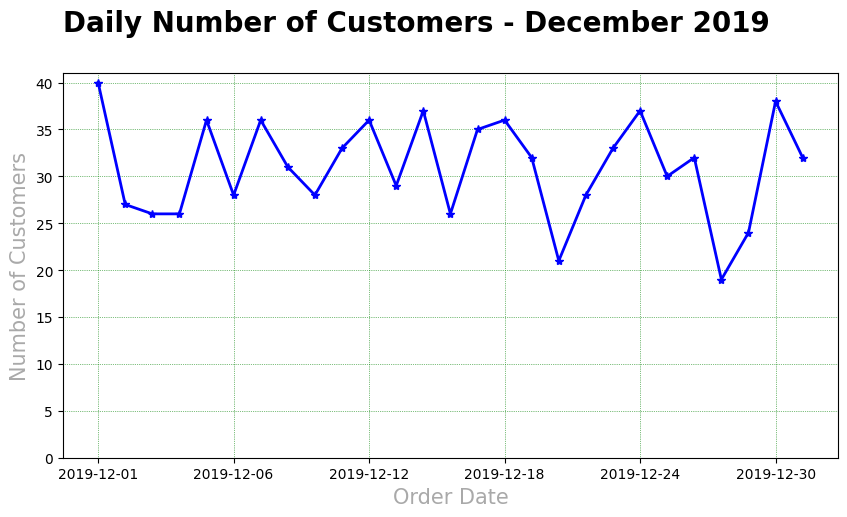

In [19]:
#Membuat plot grafik, sesuai intruksi

plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='blue', marker='*', linewidth=2)
plt.title('Daily Number of Customers - December 2019', loc='left', pad=30, fontsize=20, color='black', weight='bold')
plt.xlabel('Order Date', fontsize=15, color='darkgrey')
plt.ylabel('Number of Customers', fontsize=15, color='darkgrey')
plt.grid(color='green', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)

In [10]:
#Kasus 1
#Buat variabel baru (eg dataset_top5brand_dec)
#Berisi data penjualan bulan Desember 2019, hanya untuk top 5 brand dengan quantity terjual terbanyak selama bulan Desember 2019

top_brands = (dataset[dataset ['order_month']=='2019-12'].groupby( 'brand')['quantity']
                    .sum() 
                    .reset_index() 
                    .sort_values(by='quantity', ascending=False) 
                    .head (5))
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin( 
    top_brands['brand'].to_list()))] 
top_brands

,brand,quantity
8,BRAND_S,2197
6,BRAND_P,2194
7,BRAND_R,1508
2,BRAND_C,1365
0,BRAND_A,1315


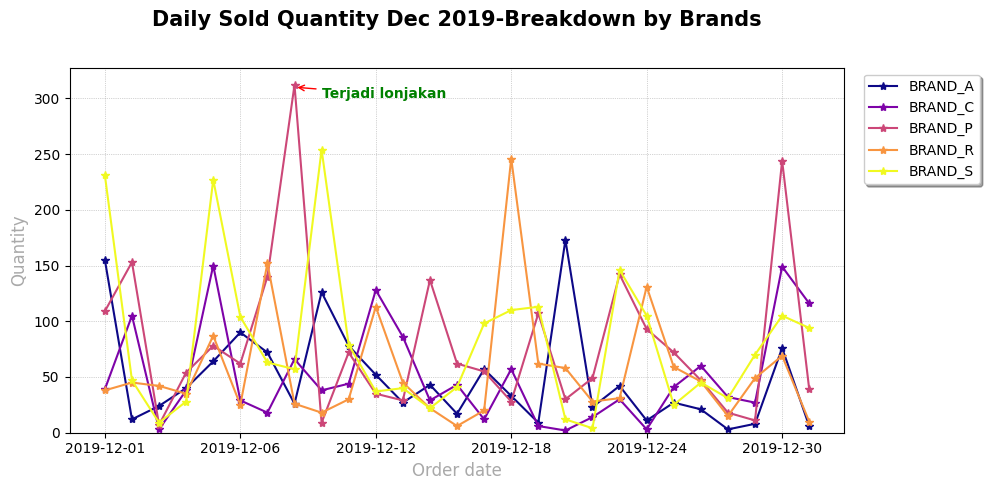

In [21]:
#Kasus 2
#Buat visualisasi bagan multi-garis untuk jumlah harian yang terjualnya, perincian per merek
#Maka, akan terlihat 1 tanggal di mana ada salah satu merek yang mengalami kerugian (kuantitas lebih tinggi dari tanggal-tanggal lain)
#Beri anotasi untuk titik terima tersebut

import matplotlib.pyplot as plt
dataset_top5brand_dec.groupby(['order_date', 'brand' ])['quantity'].sum().unstack().plot (marker='*', cmap='plasma')
plt.title('Daily Sold Quantity Dec 2019-Breakdown by Brands', loc='center', pad=30, fontsize=15, color='black', weight='bold')
plt.xlabel('Order date', fontsize = 12, color='darkgray')
plt.ylabel('Quantity', fontsize = 12, color='darkgray')
plt.grid(color= 'darkgray', linestyle=':', linewidth=0.5)
plt.ylim (ymin=0)
plt.legend (loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate( 'Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
                weight ='bold', color='green',
                arrowprops=dict(arrowstyle='->',
                                connectionstyle="arc3",
                                color='red'))
plt.gcf().set_size_inches (10, 5)
plt.tight_layout()
plt.show()

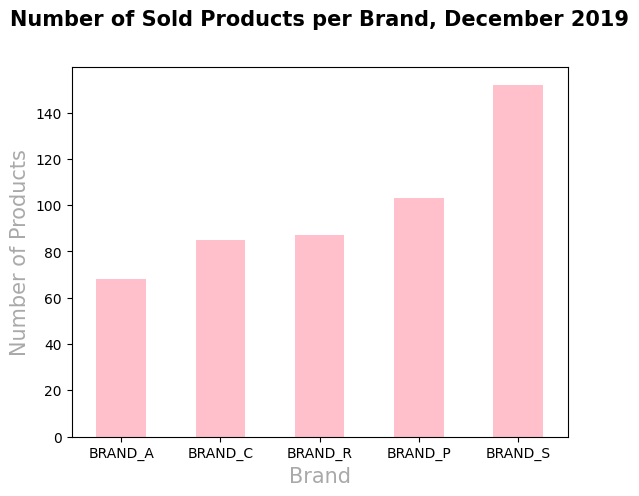

In [30]:
#Kasus 3
#Cari tahu jumlah produk untuk masing-masing merek yang laku selama bulan Desember 2019
#Gunakan barchart untuk visualisasinya, urutkan dengan yang kiri adalah merek dengan produk lebih banyak

import matplotlib.pyplot as plt
plt.clf() 
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=True).plot(kind='bar', color='pink')
plt.title('Number of Sold Products per Brand, December 2019', loc='center', pad=30, fontsize=15, color='black', weight='bold')
plt.xlabel('Brand', fontsize = 15, color='darkgray')
plt.ylabel('Number of Products', fontsize= 15, color='darkgray')
plt.ylim (ymin=0)
plt.xticks(rotation=0)
plt.show()

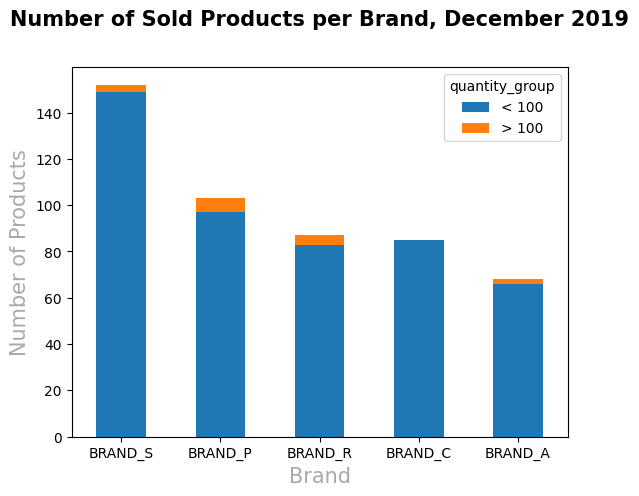

In [35]:
#Kasus 4
#Gunakan stacked chart, untuk breakdown barchart yang ada di Case 3, antara produk yang terjual >= 100 dan < 100 di bulan Desember 2019
#Membuat kerangka data baru, untuk jumlah agregat yang terjual per produk

dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()

#Beri kolom baru untuk menandai produk yang terjual >= 100 dan <100

dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product[ 
    'quantity'].apply(lambda x: '> 100' if x>=100 else '< 100') 
dataset_top5brand_dec_per_product.sort_values( 'quantity', ascending=False, inplace=True)

#Membuat referensi pengurutan merek berdasarkan banyaknya semua produk

s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

#Petak barchart bertumpuk

dataset_top5brand_dec_per_product. groupby(['brand', 'quantity_group'])[
    'product_id'].nunique().reindex (index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True) 
plt.title('Number of Sold Products per Brand, December 2019', loc='center', pad=30, fontsize=15, color='black', weight='bold')
plt.xlabel('Brand', fontsize = 15, color='darkgray')
plt.ylabel('Number of Products', fontsize= 15, color='darkgray')
plt.ylim (ymin=0)
plt.xticks(rotation=0)
plt.show()

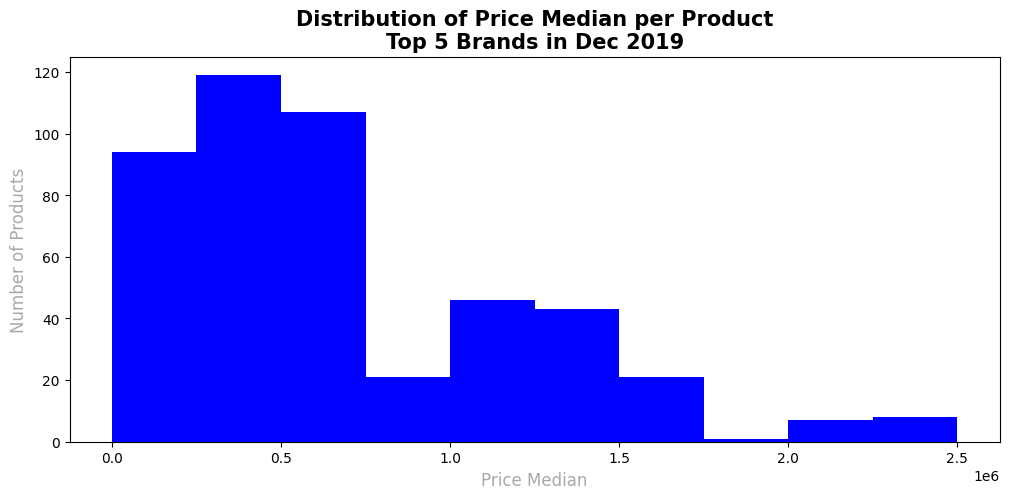

In [51]:
#Kasus 5
#Gunakan histogram untuk melihat distribusi harga product-product yang ada di top 5 brand tersebut (untuk tiap product_id, ambil median harganya)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.hist (dataset_top5brand_dec.groupby('product_id')
          ['item_price'].median(), bins=10, stacked=True, range=(1,2500000), color='blue')
plt.title('Distribution of Price Median per Product\nTop 5 Brands in Dec 2019', fontsize=15, color='black', weight='bold')
plt.xlabel('Price Median', fontsize= 12, color='darkgray')
plt.ylabel('Number of Products', fontsize= 12, color='darkgray')
plt.ylim (ymin=0)
plt.xticks(rotation=0)
plt.show()

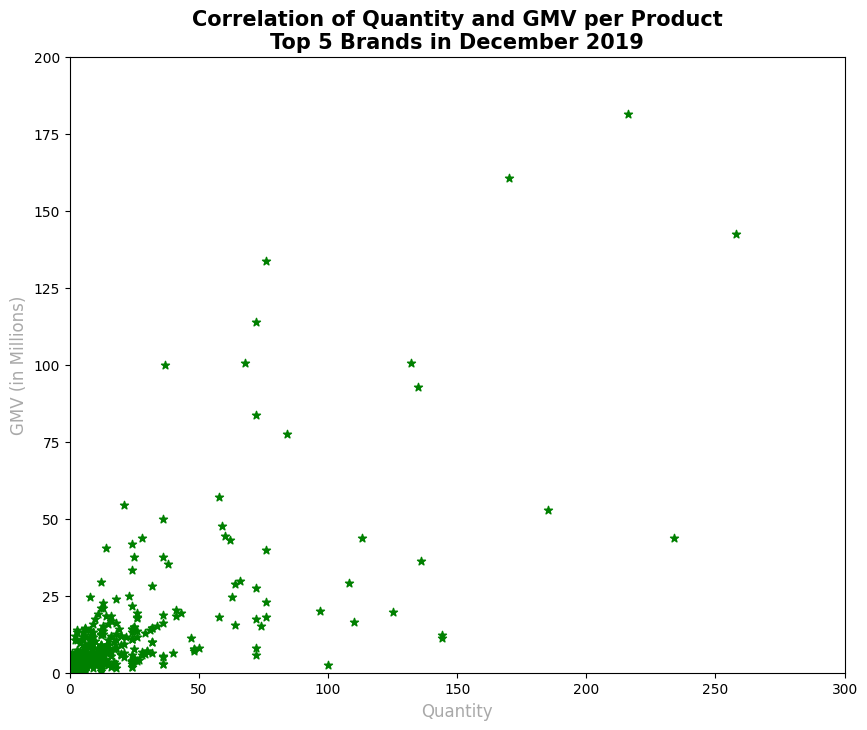

In [56]:
#Kasus 6
#Untuk setiap product_id, periksa scatterplot antara kuantitas dan GMV
#Agregat per produk

data_per_product_top5brand_dec = dataset_top5brand_dec.groupby(
     'product_id').agg({'quantity': 'sum', 'gmv': 'sum', 'item_price': 'median'}).reset_index()

#Scatter plot

plt.figure(figsize=(10,8))
plt.scatter (data_per_product_top5brand_dec[ 'quantity'], data_per_product_top5brand_dec['gmv' ], marker='*', color='green')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019', fontsize=15, color='black', weight='bold')
plt.xlabel('Quantity', fontsize = 12, color='darkgray')
plt.ylabel('GMV (in Millions)', fontsize= 12, color='darkgray')
plt.xlim(xmin=0,xmax=300)
plt.ylim (ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype (int)) 
plt.show()

<Figure size 640x480 with 0 Axes>

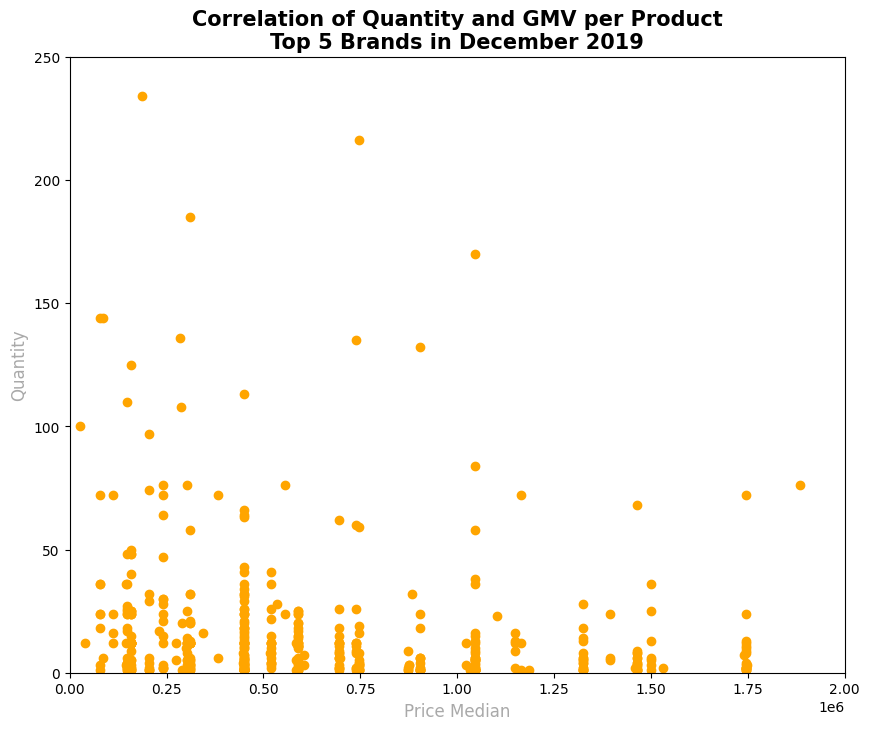

In [58]:
#Kasus 6
#Korelasi median harga vs quantity

import matplotlib.pyplot as plt
plt.clf()

#Agregat per produk

data_per_product_top5brand_dec = dataset_top5brand_dec.groupby( 'product_id').agg({ 
    'quantity': 'sum', 'gmv': 'sum', 'item_price': 'median'}).reset_index()

#scatter plot

plt.figure(figsize=(10,8))
plt.scatter (data_per_product_top5brand_dec['item_price'], data_per_product_top5brand_dec[
    'quantity'], marker='o', color='orange') 
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019', fontsize=15, color='black', weight='bold')
plt.xlabel('Price Median', fontsize=12, color='darkgray')
plt.ylabel('Quantity', fontsize = 12, color='darkgray')
plt.xlim(xmin=0,xmax=2000000)
plt.ylim (ymin=0,ymax=250)
plt.show()